In [ ]:
#Logistinė regresija

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Kompanija savo klientams išsiuntinėjo laiškus.
# žmonės arba pasielgė taip, kaip kompanija norėjo (paspaudė ant nuorodos, nusipirko produktą ir t.t.), arba ne.

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
#Duomenų analizavimas

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


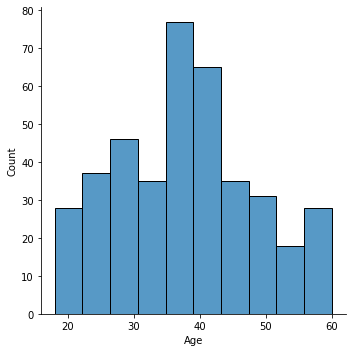

In [8]:
sns.displot(df['Age']) #matome amžiaus pasiskirstymą duomenyse.

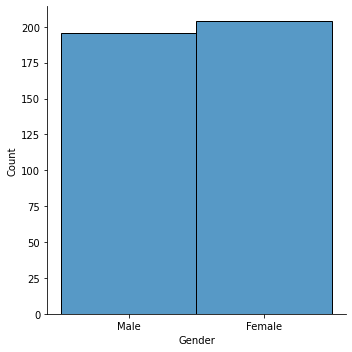

In [9]:
sns.displot(df['Gender']) #matome lyties pasiskirstymą duomenyse.

<AxesSubplot:xlabel='Purchased', ylabel='Gender'>

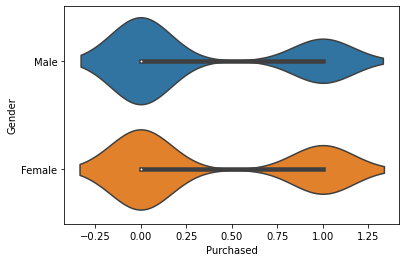

In [10]:
sns.violinplot(x='Purchased', y='Gender', data=df) #matome lyčių pasiskirstymą duomenyse pagal pirkimus.

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

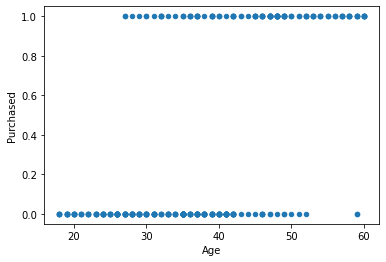

In [11]:
df.plot.scatter('Age', 'Purchased') #matome pirkimų pasiskirstymą duomenyse pagal lytį.

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

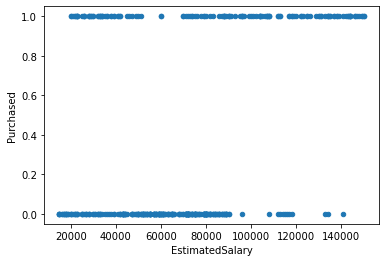

In [12]:
df.plot.scatter('EstimatedSalary', 'Purchased') #matome pirkimų pasiskirstymą duomenyse pagal pajamas.

In [31]:
#duomenų patikrinimas ir sutvarkymas

In [32]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
male               0
dtype: int64

In [33]:
df['Gender'].unique() # patikriname ar nėra kitų reikšmių nei Male ar Female.

array(['Male', 'Female'], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
ohe = OneHotEncoder()

In [36]:
ohe.fit_transform(df.Gender.values.reshape(-1, 1)).toarray()

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [37]:
ohe = OneHotEncoder(drop='first')

In [38]:
df['male'] = (ohe.fit_transform(df.Gender.values.reshape(-1, 1)).toarray())

In [39]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,male
0,15624510,Male,19,19000,0,1.0
1,15810944,Male,35,20000,0,1.0
2,15668575,Female,26,43000,0,0.0
3,15603246,Female,27,57000,0,0.0
4,15804002,Male,19,76000,0,1.0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0.0
396,15706071,Male,51,23000,1,1.0
397,15654296,Female,50,20000,1,0.0
398,15755018,Male,36,33000,0,1.0


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df[['Age', 'male']]
y = df['Purchased']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
# Apmokymui panaudojam mokymui skirtus duomenis (70%) t.y. X_train, y_train 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Spėjimui panaudojom testavimui skirtus duomenis (30%) t.y. X_test
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [44]:
# Patikrinimui panaudojom testavimui skirtus duomenis (30%) t.y. X_test, y_test
model.score(X_test, y_test)

0.85

In [45]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_predicted)

array([[75,  8],
       [10, 27]], dtype=int64)

kaip dažnai mūsų modelis daro pirmo ir antro tipo klaidas galime įvertinti naudodami tokią klasifikacinę lentelę (confusion matrix):

![](https://miro.medium.com/max/332/0*dh9DQi6-yMo3VGBT.png)

In [46]:
#false positive - I tipo klaida. sergi, nors is tikro nesergi
#false negative - II antro tipo klaida. nesergi, nors is tikro sergi

In [47]:
#model.predict([[80, 1.0]])